## Apartment room photographs classification

This notebook lets you provide an image of any type of apartment room, and our model will classify it for you.

In [1]:
import numpy as np
import pandas as pd
import keras
import os
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
%matplotlib notebook

In [3]:
english = True
if english:
    label_lst = [
        "Living room", "Kitchen", "Hallway", "Bathroom", "Bedroom", "Balcony",
        "House", "Facade", "Sauna", "Terrace", "Separate WC", "Floor plan",
        "Dining space", "Yard", "Other", "Upstairs", "Open kitchen",
        "Downstairs", "Room", "Clothes room", "Utility room", "WC", "Alcove",
        "Fireplace"
    ]
else:
    label_lst = [
        'Olohuone', 'Keittiö', 'Eteinen', 'Kylpyhuone', 'Makuuhuone',
        'Parveke', 'Talo', 'Julkisivu', 'Sauna', 'Terassi', 'Erillinen WC',
        'Pohjakuva', 'Ruokailutila', 'Other', 'Piha', 'Yläkerta', 'Avokeittiö',
        'Alakerta', 'Huone', 'Vaatehuone', 'Kodinhoitohuone', 'WC', 'Alkovi',
        'Takkahuone'
    ]

Function for generating a neat plot:

In [4]:
def plot(pred, only_important_labels):
    #setting parameters:
    fontsize = 9
    bar_color = 'lightblue'
    text_color = 'xkcd:tangerine'
    #preparing data:
    di = dict(zip(label_lst, pred[0]))
    prediction = sorted(di.items(), key=lambda kv: kv[1])
    labels = np.array(prediction)[:, 0]
    values = np.array(prediction)[:, 1].astype(np.float32)
    #building the plot:
    f = plt.figure()
    ax = f.add_subplot(1, 1, 1)
    ax.barh(labels, values, color=bar_color)
    ax.set_xlabel('Certainty that this is shown in the picture')
    ax.set_ylabel('Detectable classes')
    ax.set_yticks([])
    #writing text, i.e. labels, to the right position:
    r = f.canvas.get_renderer()
    ts = [
        ax.text(0, 0, labels[i], fontweight='bold', fontsize=fontsize)
        for i, v in enumerate(values)
    ]
    widths = [
        t.get_window_extent(renderer=r).transformed(ax.transData.inverted()).x1
        for t in ts
    ]
    for t in ts:
        t.remove()
    threshold = len(values) - np.argmax(np.flip(values - widths - 0.005) < 0)
    for i, v in enumerate(values):
        if i > threshold - 1:
            v = v - widths[i] - 0.008
        if (i > threshold - 1 or not only_important_labels):
            ax.text(
                v + 0.003,
                i - .3,
                labels[i],
                color=text_color,
                fontweight='bold',
                fontsize=fontsize)
    return f

Load the model:

In [5]:
path_to_model = 'cnn/weights.30.h5'
model = load_model(path_to_model)

Load your image:

(It's gonna be resized and scaled, but don't worry, the file on your disk won't be changed.)

In [6]:
path_to_img = 'pictures/living_room.jpg'
img = Image.open(path_to_img).resize((299, 299))

<IPython.core.display.Javascript object>


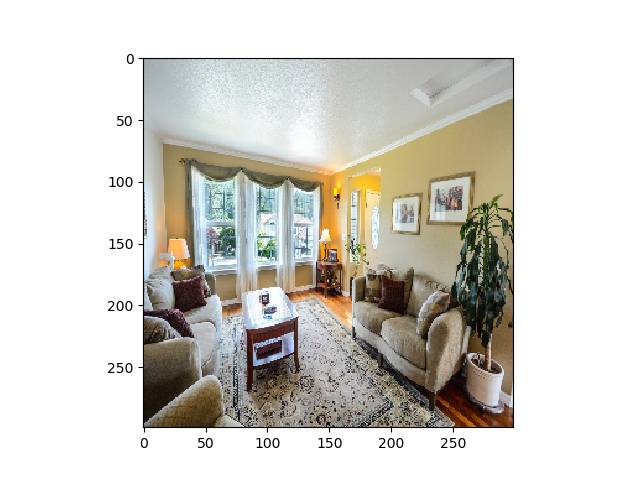

In [7]:
img_array = np.array(img) / 255
plt.figure()
plt.imshow(img_array)

Classify the image:

In [8]:
pred = model.predict(np.array([img_array]))

<IPython.core.display.Javascript object>


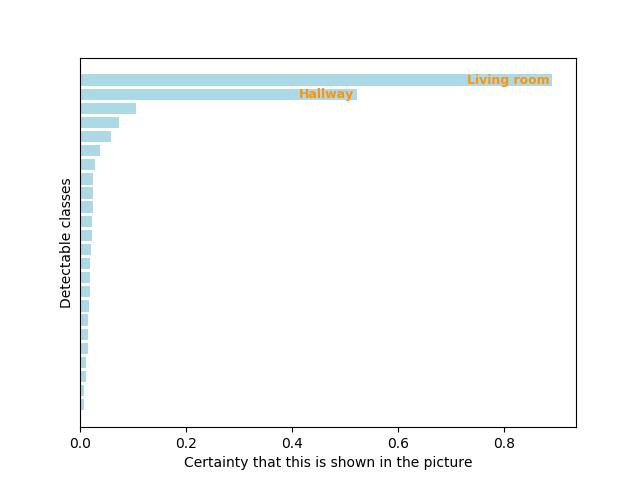

In [9]:
plot(pred, only_important_labels=True).show()

Inception's predictions in full:

In [10]:
di = dict(zip(label_lst, pred[0]))
sorted(di.items(), key=lambda kv: kv[1], reverse=True)

[('Living room', 0.8914378),
 ('Hallway', 0.52240777),
 ('Bedroom', 0.10577865),
 ('Open kitchen', 0.073229395),
 ('Kitchen', 0.0593748),
 ('Dining space', 0.038205028),
 ('Room', 0.027904654),
 ('Downstairs', 0.024915138),
 ('Balcony', 0.02476451),
 ('Terrace', 0.02393832),
 ('Clothes room', 0.022451365),
 ('Upstairs', 0.022246208),
 ('Facade', 0.02119123),
 ('Utility room', 0.018733462),
 ('WC', 0.018732475),
 ('Alcove', 0.018207276),
 ('House', 0.01784573),
 ('Floor plan', 0.01559417),
 ('Separate WC', 0.015244999),
 ('Other', 0.014831147),
 ('Fireplace', 0.011409365),
 ('Yard', 0.010814194),
 ('Bathroom', 0.0080595175),
 ('Sauna', 0.007104769)]